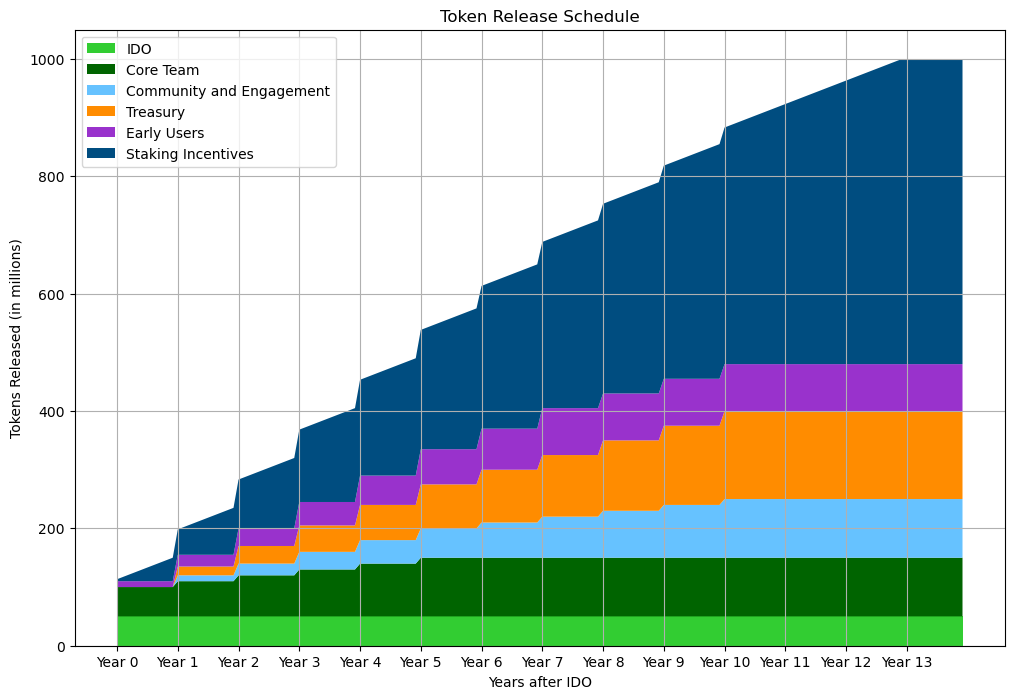

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialer Supply und Verteilung
initial_supply = 1000000000  # 1 Milliarde

# Definition der Verteilung in Prozent
distribution = {
    'IDO': 5,
    'Core Team': 10,  # 5% sofort + 5% über 5 Jahre
    'Community and Engagement': 10,  # 10% über 10 Jahre
    'Treasury': 15,  # 15% über 10 Jahre
    'Early Users': 8,  # 1% sofort + 7% über 7 Jahre
    'Staking Incentives': 52  # 4% jährlich über 13 Jahre
}

# Zeitachse für 156 Monate (13 Jahre) in Schritten von einem Monat
time_points = np.arange(0, 168, 1)

# Initialisierung des DataFrames mit float64 als Datentyp
df = pd.DataFrame(0.0, index=time_points, columns=distribution.keys())

# Verteilungsberechnung
for category, percent in distribution.items():
    total_tokens = (percent / 100) * initial_supply
    
    if category == 'IDO':
        # Sofortige Freigabe
        df.loc[0, category] = total_tokens
    
    elif category == 'Core Team':
        # 5% sofort + 1% jährlich für 5 Jahre (stufenweise)
        immediate_release = 0.05 * initial_supply
        annual_release = 0.01 * initial_supply  # 1% jährlich
        
        df.loc[0, category] = immediate_release  # Sofortige Freigabe von 5%
        for year in range(1, 6):  # Stufenweise Verteilung über 5 Jahre
            df.loc[year * 12, category] = annual_release
    
    elif category == 'Treasury':
        # Linear über 10 Jahre (1.5% jährlich, stufenweise)
        annual_release = 0.015 * initial_supply  # 1.5% jährlich
        for year in range(1, 11):  # Stufenweise Verteilung über 10 Jahre
            df.loc[year * 12, category] = annual_release

    elif category == 'Community and Engagement':
        # Linear über 10 Jahre (1% jährlich, stufenweise)
        annual_release = 0.01 * initial_supply  # 1% jährlich
        for year in range(1, 11):  # Stufenweise Verteilung über 10 Jahre
            df.loc[year * 12, category] = annual_release

    elif category == 'Early Users':
        # 1% sofortige Freigabe + 7% linear über 7 Jahre (stufenweise)
        immediate_release = 0.01 * initial_supply
        annual_release = 0.01 * initial_supply  # 1% jährlich
        
        df.loc[0, category] = immediate_release  # Sofortige Freigabe von 1%
        for year in range(1, 8):  # Stufenweise Verteilung über 7 Jahre
            df.loc[year * 12, category] = annual_release
    
    elif category == 'Staking Incentives':
        # Annähernd linear über 13 Jahre (4% jährlich)
        total_release = 0.04 * initial_supply  # 4% jährlich
        monthly_release = total_release / 12  # Monatliche Verteilung
        
        for year in range(1, 14):  # Annähernd lineare Verteilung über 13 Jahre
            for month in range(12):
                df.loc[(year - 1) * 12 + month, category] = monthly_release

# Kumulation der Verteilungen
df = df.cumsum()

# Konvertierung in Millionen für eine bessere Lesbarkeit
df /= 1e6

# Farben für die einzelnen Kategorien basierend auf dem Bild
colors = {
    'Staking Incentives': '#004d80',  # Dunkelblau
    'Treasury': '#ff8c00',            # Orange
    'Core Team': '#006400',           # Dunkelgrün
    'Community and Engagement': '#66c2ff',  # Hellblau
    'Early Users': '#9932cc',         # Magenta/Violett
    'IDO': '#32cd32'                  # Hellgrün
}

# Grafische Darstellung
plt.figure(figsize=(12, 8))
plt.stackplot(df.index, df.T, labels=df.columns, colors=[colors[key] for key in df.columns])
plt.title('Token Release Schedule')
plt.xlabel('Years after IDO')
plt.ylabel('Tokens Released (in millions)')
plt.xticks(np.arange(0, 168, 12), [f'Year {i}' for i in range(14)])  # Setzt X-Achse in Jahren
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
